In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/drw-crypto-market-prediction/sample_submission.csv
/kaggle/input/drw-crypto-market-prediction/train.parquet
/kaggle/input/drw-crypto-market-prediction/test.parquet


## Dataset trend

In [4]:
import polars as pl
df_train = pd.read_parquet('/kaggle/input/drw-crypto-market-prediction/train.parquet')
df_test = pd.read_parquet('/kaggle/input/drw-crypto-market-prediction/test.parquet')

df_train = df_train.reset_index()

# convert from pandas to polars
# df_train = pl.from_pandas(df_train)
# df_test = pl.from_pandas(df_test)

In [5]:
df_train.head(5)

,index,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
0,2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
1,2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2,2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
3,2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
4,2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


In [13]:
df_test.head(5)

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.317,8.102,13.164,10.272,23.436,-0.341229,0.041851,-0.020094,-0.206221,-0.297124,...,-0.147911,-0.043417,1.521787,1.548965,1.495735,1.166730,0.281056,-0.187831,-0.599553,0
2,2.608,2.111,123.562,40.163,163.725,-1.029564,-1.382505,-1.214935,-1.020241,-0.960397,...,-0.126703,-0.077090,-0.703054,-0.716951,-0.721292,-0.674619,-0.639318,-0.736268,-0.862220,0
3,2.768,10.787,126.137,118.266,244.403,-2.594090,-5.486158,-4.744466,-3.930152,-3.275324,...,-0.147750,-0.030627,-0.703514,-0.717525,-0.731701,-0.750998,-0.789366,-0.850941,-1.033131,0
4,0.948,12.157,16.069,31.723,47.792,0.240745,0.997585,1.028965,1.081052,0.811895,...,-0.136737,-0.033380,1.521167,1.551771,1.582833,1.625830,1.762155,1.911924,1.962445,0
5,1.084,3.493,32.679,37.327,70.006,0.067189,0.772852,0.772152,0.714846,0.514422,...,-0.218991,-0.004915,-0.703161,-0.716900,-0.714699,-0.652209,-0.623165,-0.699887,-0.640094,0


[<Axes: > <Axes: >]
Axes(0.125,0.53;0.775x0.35)


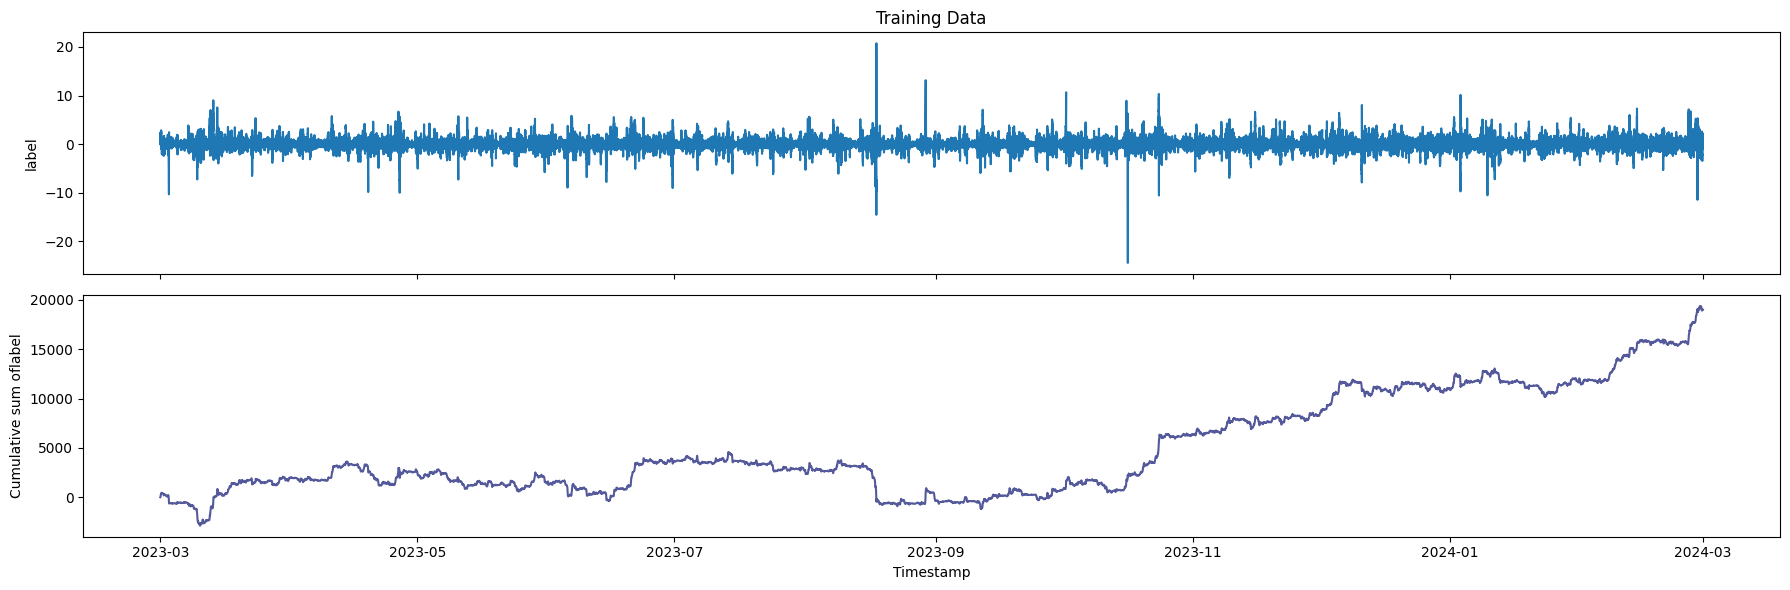

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
colors = ["#068D9D", "#53599A", "#607BB0", "#6D9DC5", "#77BECF", "#80DED9", "#AEECEF"]
target = 'label'

fig, ax = plt.subplots(2,1,figsize=(18,6),sharex=True)

print(ax)
print(ax[0])
ax[0].plot(df_train["index"], df_train[target])
ax[0].set_ylabel(target)
ax[0].set_title("Training Data")

ax[1].plot(df_train["index"], np.cumsum(df_train[target]), color=colors[1])
ax[1].set_ylabel("Cumulative sum of" + target)
ax[1].set_xlabel("Timestamp")

plt.tight_layout()

In [7]:
proprietary_features = [col for col in df_train.columns if col.startswith('X')]
basic_features = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']
all_features = basic_features + proprietary_features

In [ ]:
fig1, axes = plt.subplots(2, 4, figsize=(18, 8))
X_features = df_train[all_features]

for i, feature in enumerate(['label'] + all_features[:7]):
    row, col = i // 4, i % 4
    sns.histplot(df_train[feature], kde=True, bins=50, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Data Analysis

In [13]:
df_train = pl.from_pandas(df_train)
print(type(df_train))

# Get count ofnull values per column
null_counts = df_train.select(proprietary_features).null_count() # df_train[proprietary_features].is_null().sum()
# Filter to show only columns with missing values
columns_with_nulls = null_counts.select([col for col in null_counts.columns if null_counts[col].item()>0])

if columns_with_nulls.is_empty():
    print("There are no columns with NA values.")
else :
    print(columns_with_nulls)

<class 'polars.dataframe.frame.DataFrame'>
There are no columns with NA values.


In [14]:
%%time
single_unique_value =[]
print(f"feature |unique value count")
for col in all_features:
    _cnt = df_train[col].n_unique() 
    if _cnt < 10:
        single_unique_value.append(col)
        print(f"{col}|{_cnt}")
        
print(f"There are {len(single_unique_value)} features with single unique value.")

feature |unique value count
There are 0 features with single unique value.
CPU times: user 33.7 s, sys: 646 ms, total: 34.4 s
Wall time: 10.2 s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


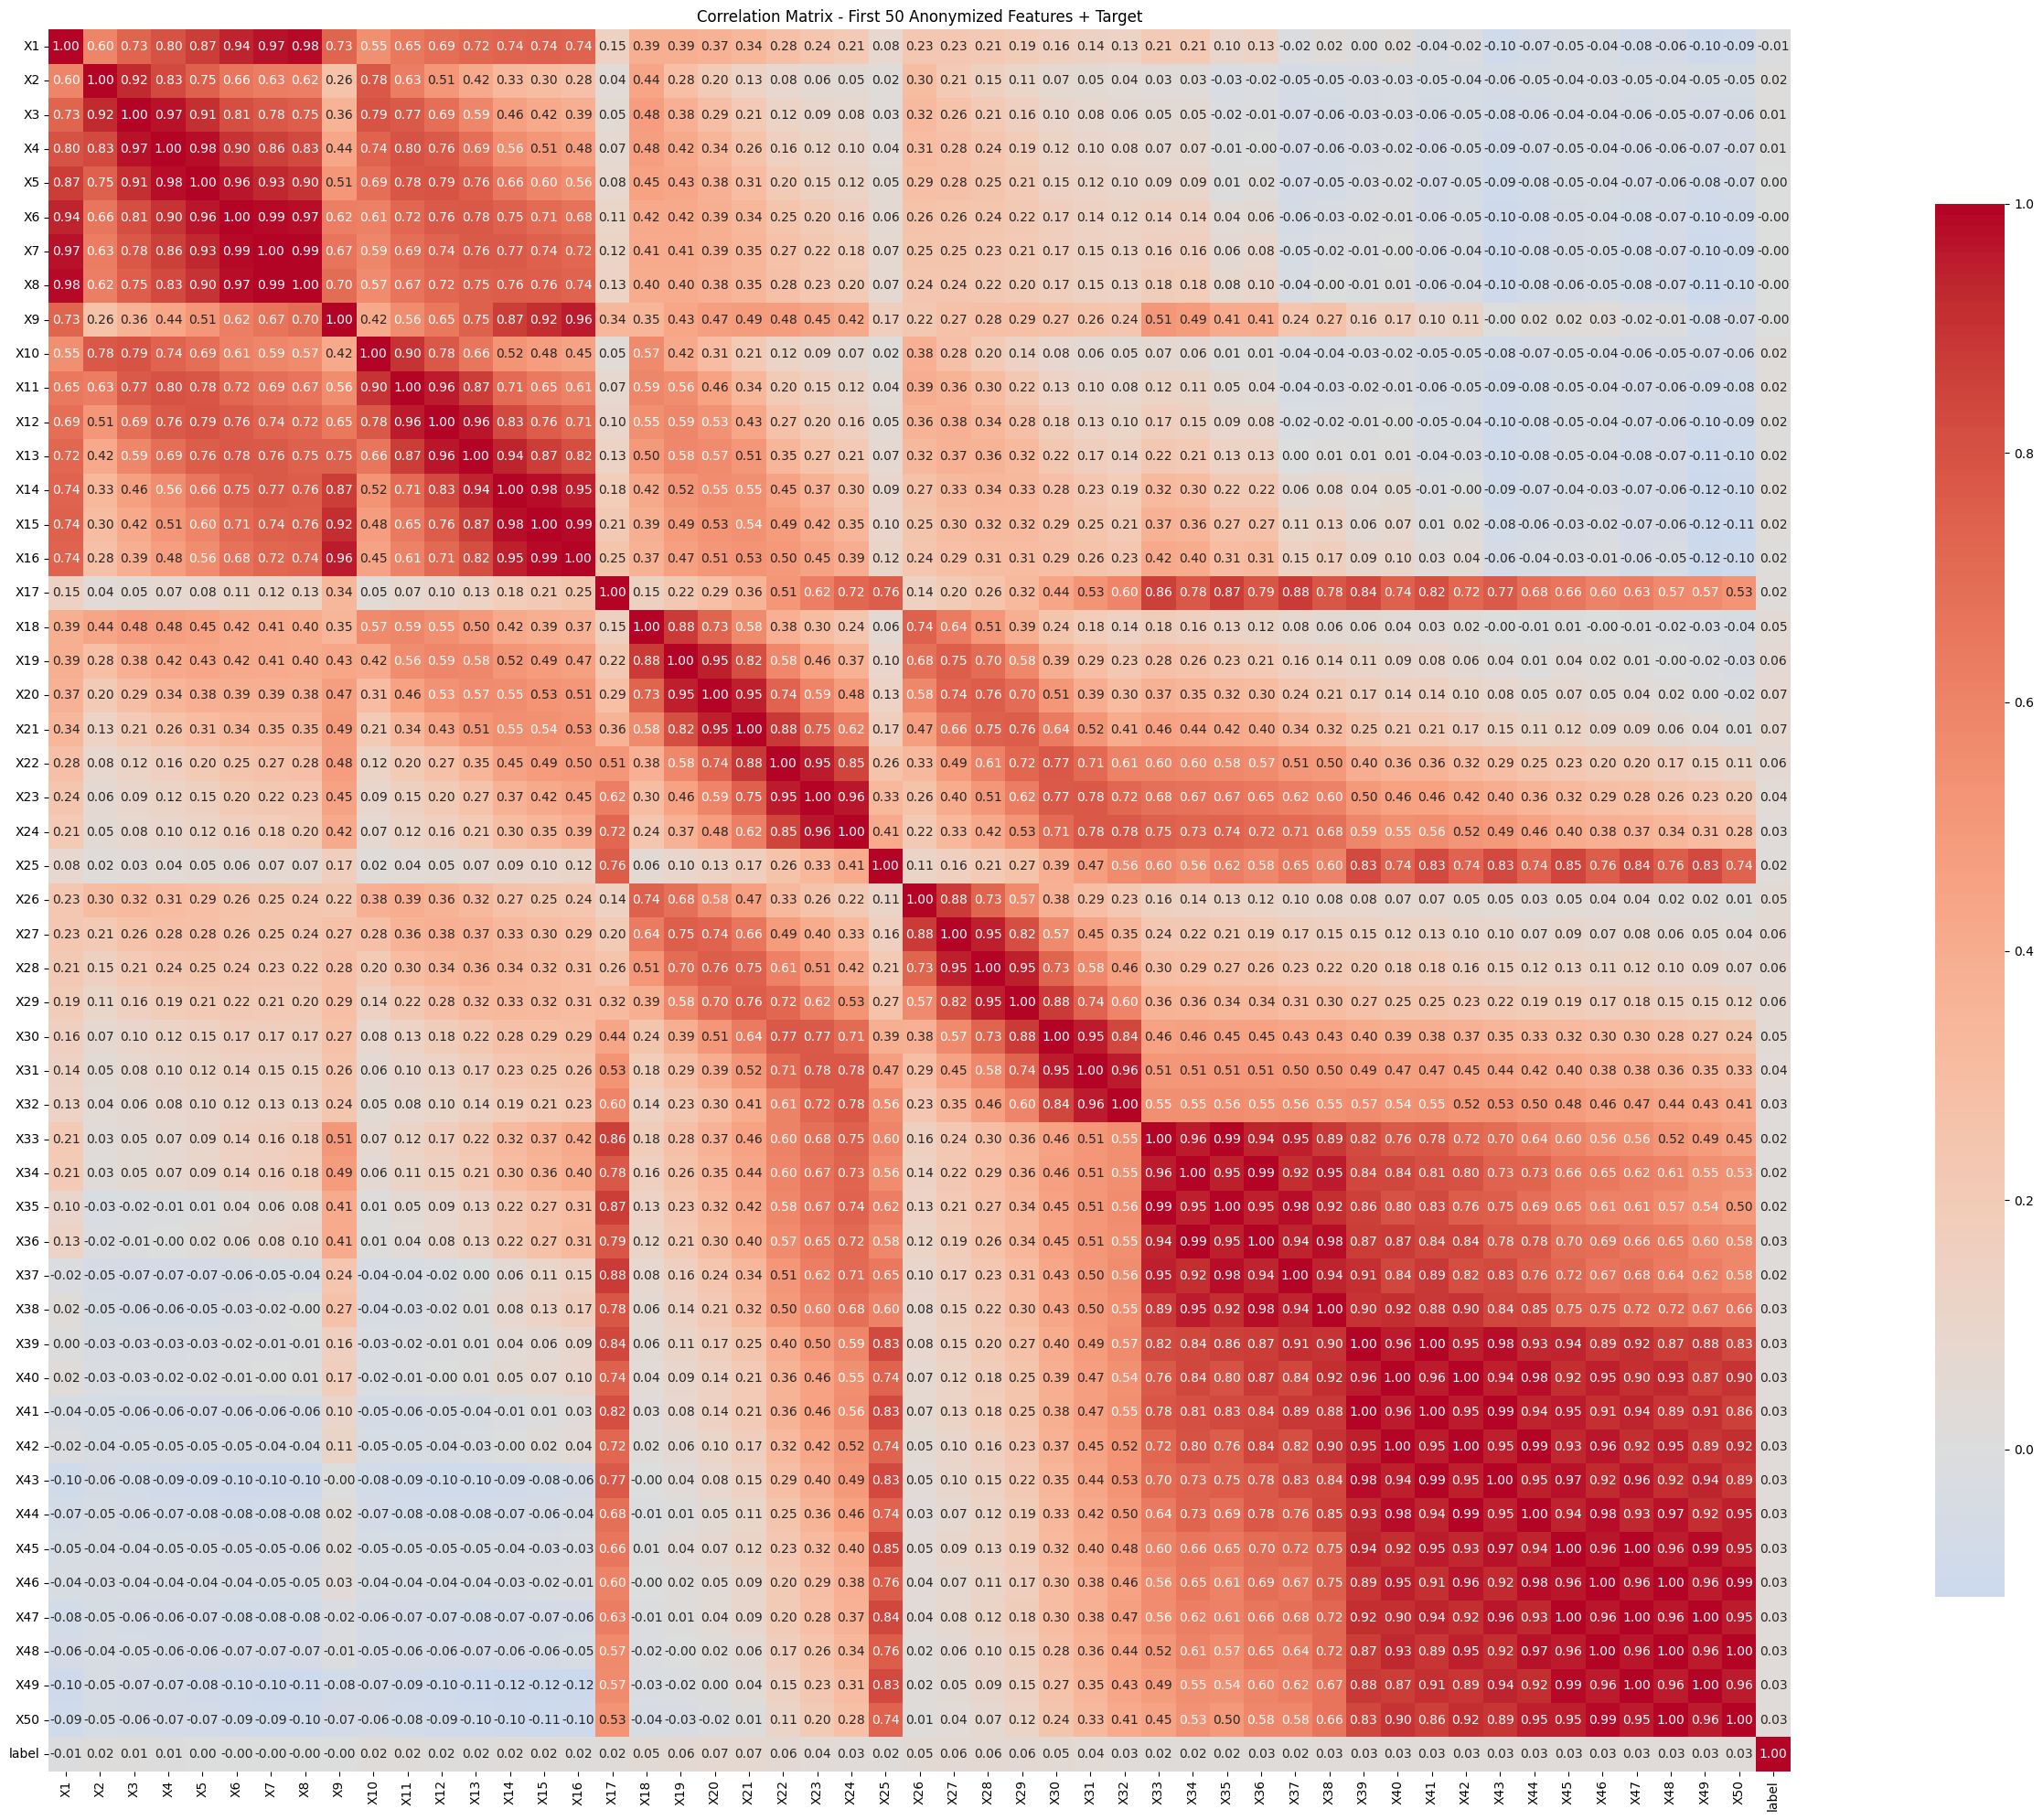

In [8]:
# Correlation analysis for a subset of features (first 50 for visualization)
subset_features = proprietary_features[:50]
correlation_matrix = df_train[subset_features  + [target]].corr()

# Plot correlation heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, fmt='.2f',annot=True, cbar_kws={'shrink': 0.8},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix - First 50 Anonymized Features + Target')
plt.tight_layout()
plt.show()

In [10]:
def find_high_correlations(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix[i, j]
                })
    return pd.DataFrame(high_corr_pairs)

high_corr_df = find_high_correlations(correlation_matrix, threshold=0.98)
print(f"High correlation pairs (|corr| > 0.98):")
print(high_corr_df.sort_values('correlation', key=abs, ascending=False).head(50))

# Correlation with target variable
# df_train.to_pandas()
# print(type(df_train))
corr_all_matrix = df_train[proprietary_features  + [target]].corr().to_pandas()
print(type(corr_all_matrix))
target_correlations = corr_all_matrix[target].abs().sort_values(ascending=False)
print(f"\nTop 20 features most correlated with target:")
print(target_correlations.head(21)[1:])  # Exclude target itself

KeyError: (0, 1)

# Data Preprocessing
---
1. missing data 缺失值处理
2. low variance feature 去除无意义变量
3. 只保留一个相似度高的冗余变量
4. 选出高相关性变量
5. 特征工程
6. 内存管理

In [15]:
# 2.
print(f"remove {len(single_unique_value)} low variance features: ", single_unique_value)

df_train_clean = df_train.drop(single_unique_value)

remove 0 low variance features:  []


In [17]:
# 3.
# high_corr_matrix = df_train_clean.corr().abs()
high_corr_matrix = df_train_clean.corr()
high_corr_matrix = high_corr_matrix.to_pandas().abs()
# 选择上三角矩阵，避免重复
upper_tri = high_corr_matrix.where(np.triu(np.ones(high_corr_matrix.shape), k = 1).astype(bool))

redundant_fea = [col for col in upper_tri if any(upper_tri[col] > 0.98)]

print(f"remove {len(redundant_fea)} highly correlated features: ", redundant_fea)

df_train_clean = df_train_clean.drop(redundant_fea)

remove 116 highly correlated features:  ['X7', 'X8', 'X15', 'X16', 'X35', 'X36', 'X38', 'X41', 'X42', 'X43', 'X44', 'X47', 'X48', 'X49', 'X50', 'X52', 'X53', 'X54', 'X55', 'X56', 'X104', 'X110', 'X116', 'X122', 'X128', 'X134', 'X140', 'X146', 'X152', 'X158', 'X164', 'X170', 'X176', 'X182', 'X188', 'X191', 'X241', 'X242', 'X243', 'X244', 'X245', 'X246', 'X247', 'X254', 'X255', 'X263', 'X282', 'X283', 'X284', 'X285', 'X288', 'X289', 'X290', 'X291', 'X294', 'X295', 'X296', 'X297', 'X299', 'X300', 'X301', 'X302', 'X303', 'X351', 'X357', 'X363', 'X369', 'X375', 'X381', 'X387', 'X393', 'X399', 'X405', 'X411', 'X417', 'X423', 'X429', 'X434', 'X435', 'X438', 'X488', 'X489', 'X490', 'X491', 'X492', 'X493', 'X494', 'X515', 'X518', 'X527', 'X530', 'X539', 'X542', 'X551', 'X554', 'X563', 'X565', 'X566', 'X575', 'X577', 'X578', 'X580', 'X587', 'X590', 'X592', 'X687', 'X691', 'X695', 'X699', 'X703', 'X715', 'X719', 'X723', 'X775', 'X776', 'X777']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [19]:
# 4.
#计算与目标的皮尔森相关系数
target_corr = df_train_clean.corr()[target].to_pandas().abs()
top_corr_fea = target_corr.sort_values(ascending = False).head(51).index.tolist()

selected_features = [df_train_clean.columns[i] for i in top_corr_fea]

print(f"remain {len(top_corr_fea)-1} features most correlated with target: ",selected_features)

# df_train_clean = df_train_clean[selected_features]
print(df_train_clean.columns)

remain 50 features most correlated with target:  ['label', 'X752', 'X21', 'X20', 'X28', 'X759', 'X29', 'X19', 'X27', 'X22', 'X754', 'X219', 'X756', 'X287', 'X293', 'X753', 'X614', 'X218', 'X751', 'X298', 'X26', 'X292', 'X30', 'X465', 'X18', 'X466', 'X181', 'X286', 'X281', 'X217', 'X175', 'X757', 'X226', 'X225', 'X23', 'X508', 'X137', 'X95', 'X198', 'X272', 'X472', 'X277', 'X224', 'X656', 'X652', 'X31', 'X758', 'X131', 'X89', 'X278', 'X464']
['index', 'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X37', 'X39', 'X40', 'X45', 'X46', 'X51', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 

In [21]:
df_train_clean = df_train_clean.to_pandas()
print(type(df_train_clean))

<class 'pandas.core.frame.DataFrame'>


In [22]:
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>


# Training

In [3]:
!pip install koolbox scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.2 MB/s eta 0:00:00:00:01:01m
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from scipy.stats import pearsonr
from xgboost import XGBRegressor
from sklearn.base import clone
from koolbox import Trainer
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import optuna
import joblib
import gc

warnings.filterwarnings("ignore")

In [5]:
# remain 50 features most correlated with target:  
top50_corr_fea = ['label', 'X78', 'X685', 'X72', 'X84', 'X673', 'X847', 
                  'X325', 'X664', 'X287', 'X66', 'X121', 'X91', 'X385', 
                  'X51', 'X523', 'X90', 'X319', 'X85', 'X97', 'X286', 
                  'X115', 'X661', 'X695', 'X262', 'X96', 'X331', 'X579', 
                  'X261', 'X46', 'X45', 'X343', 'X676', 'X337', 'X686', 
                  'X868', 'X846', 'X800', 'X683', 'X313', 'X328', 'X157', 
                  'X151', 'X138', 'X14', 'X845', 'X109', 'X25', 'X427', 
                  'X119', 'X256']

removed_fea = ['X7', 'X8', 'X15', 'X16', 'X35', 'X36', 'X38', 'X41', 
               'X42', 'X43', 'X44', 'X47', 'X48', 'X49', 'X50', 'X52', 
               'X53', 'X54', 'X55', 'X56', 'X104', 'X110', 'X116', 'X122', 
               'X128', 'X134', 'X140', 'X146', 'X152', 'X158', 'X164', 'X170', 
               'X176', 'X182', 'X188', 'X191', 'X241', 'X242', 'X243', 'X244', 
               'X245', 'X246', 'X247', 'X254', 'X255', 'X263', 'X282', 'X283', 
               'X284', 'X285', 'X288', 'X289', 'X290', 'X291', 'X294', 'X295', 
               'X296', 'X297', 'X299', 'X300', 'X301', 'X302', 'X303', 'X351', 
               'X357', 'X363', 'X369', 'X375', 'X381', 'X387', 'X393', 'X399', 
               'X405', 'X411', 'X417', 'X423', 'X429', 'X434', 'X435', 'X438', 
               'X488', 'X489', 'X490', 'X491', 'X492', 'X493', 'X494', 'X515', 
               'X518', 'X527', 'X530', 'X539', 'X542', 'X551', 'X554', 'X563', 
               'X565', 'X566', 'X575', 'X577', 'X578', 'X580', 'X587', 'X590', 
               'X592', 'X687', 'X691', 'X695', 'X699', 'X703', 'X715', 'X719', 
               'X723', 'X775', 'X776', 'X777']

target = "label"

In [6]:
train_path = "/kaggle/input/drw-crypto-market-prediction/train.parquet"
test_path = "/kaggle/input/drw-crypto-market-prediction/test.parquet"
sample_sub_path = "/kaggle/input/drw-crypto-market-prediction/sample_submission.csv"

train = pd.read_parquet(train_path)

test = pd.read_parquet(test_path)

In [7]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [15]:
train.head(5)

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,0.116698,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,0.475255,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,0.203282,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,0.014459,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,0.214073,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


In [ ]:
x = df_train_clean.drop(target, axis=1)
y = df_train_clean[target]
x_test = df_test

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
# print("Train set:", train.columns)

train = train.drop(columns=removed_fea)
test = test.drop(columns=removed_fea)

# train = reduce_mem_usage(train, "train")
# test = reduce_mem_usage(test, "test")

In [9]:
x = train.drop(target, axis=1)
y = train[target]
x_test = test.drop(target, axis=1)
y_test = test[target]

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [22]:
test.head(5)

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X768,X769,X770,X771,X772,X773,X774,X778,X779,X780
0,0.317,8.102,13.164,10.272,23.436,-0.341229,0.041851,-0.020094,-0.206221,-0.297124,...,-0.238371,-0.032994,-1.497419,-0.525974,-0.147911,-0.043417,1.521787,0.281056,-0.187831,-0.599553
1,2.608,2.111,123.562,40.163,163.725,-1.029564,-1.382505,-1.214935,-1.020241,-0.960397,...,0.376866,0.609505,-0.266302,-0.340076,-0.126703,-0.077090,-0.703054,-0.639318,-0.736268,-0.862220
2,2.768,10.787,126.137,118.266,244.403,-2.594090,-5.486158,-4.744466,-3.930152,-3.275324,...,-0.023192,0.397028,-0.413090,2.131345,-0.147750,-0.030627,-0.703514,-0.789366,-0.850941,-1.033131
3,0.948,12.157,16.069,31.723,47.792,0.240745,0.997585,1.028965,1.081052,0.811895,...,-1.229467,-1.144260,-0.812698,0.524579,-0.136737,-0.033380,1.521167,1.762155,1.911924,1.962445
4,1.084,3.493,32.679,37.327,70.006,0.067189,0.772852,0.772152,0.714846,0.514422,...,0.211673,0.325342,-1.323223,-0.523453,-0.218991,-0.004915,-0.703161,-0.623165,-0.699887,-0.640094


In [21]:
x_test = test.drop(target, axis=1)
y_test = test[target]

KeyError: "['label'] not found in axis"

## LGBM baseline

In [10]:
def pearson_metric(y_true, y_pred):
    pearson_r, _ = pearsonr(y_true, y_pred)
    return 'pearson', pearson_r, True

In [12]:
lgb_params = dict(
    objective="regression",
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=64,
    max_depth=-1, # 表示不限制深度，靠num_leaves控制
    subsample=0.8, # 行采样
    colsample_bytree=0.8, # 列采样
    reg_lambda=1.0, # C2正则
    device="gpu"
)

lgb_model = LGBMRegressor(**lgb_params)
lgb_model.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    eval_metric=pearson_metric,
    callbacks=[lgb.early_stopping(50, verbose=False)],
    force_col_wise=True,
)

lgb_pred = lgb_model.predict(x_test)
print("LightGBM RMSE:", mean_squared_error(y_test, lgb_pred, squared=False))

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 170585
[LightGBM] [Info] Number of data points in the train set: 420708, number of used features: 669
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 667 dense feature groups (268.01 MB) transferred to GPU in 0.162246 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.037921


NameError: name 'y_test' is not defined

## XGBoost baseline

In [ ]:
xgb_params = dict(
    objective="reg:squarederror",
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=8, 
    subsample=0.8, # 行采样
    colsample_bytree=0.8, # 列采样
    reg_lambda=1.0, # C2正则
    reg_alpha=0.0,
    tree_method="hist" # GPU可用则“gpu_hist”
)

xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    early_stopping_rounds=50, 
    verbose=False
)

xgb_pred = lgb_model.predict(x_test)
print("LightGBM RMSE:", mean_squared_error(y_test, lgb_pred, squared=False))

# Feature Importance

In [16]:
# 训练决策树时，模型会选择某个特征和某个分裂点将数据划分为左右子集，以最小化损失——信息增益（Gain）
# 在回归中通常是减少了的平方误差
importance = lgb_model.booster_.feature_importance(importance_type='gain')
feature_names = lgb_model.booster_.feature_name()

imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

print(imp_df)

    feature    importance
649    X758  71557.893754
582    X683  69907.228751
666    X778  50870.578014
667    X779  44736.638912
668    X780  44608.486108
..      ...           ...
610    X717      3.965070
558    X659      3.401510
587    X689      3.038250
288    X347      2.255000
405    X481      0.000000

[669 rows x 2 columns]


## Optuna $\times$ LightGBM

In [18]:
def objective_lgb(trial):
    params = {
        "objective": "regression",
        "metric": "None", #自定义评估？
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 31, 256),
        "max_depth": trial.suggest_int("max_depth", -1, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 120),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_estimators": 2000,
        "device": "gpu",
        'gpu_platform_id': 0,  # 指定 GPU 平台 ID
        'gpu_device_id': 0,    # 指定第一个 GPU 设备 ID
        'tree_learner': 'data',  # 使用数据并行
        'num_threads': 2,
        "verbosity": -1,
    }

    model= lgb.LGBMRegressor(**params)
    model.fit(
        x_train, y_train,
        eval_set=[(x_val, y_val)],
        eval_metric=lambda y_true, y_pred: ("pearson", pearsonr(y_true, y_pred)[0], True),
        callbacks=[lgb.early_stopping(50, verbose=False)],
        force_col_wise=True
    )
    
    preds = model.predict(x_val)
    score = pearsonr(y_val, preds)[0] # 相关系数越大越好
    gc.collect()
    return score

In [22]:
sampler = optuna.samplers.TPESampler(seed=42) #TPE采样器
study_lgb = optuna.create_study(direction="maximize", sampler=sampler)
study_lgb.optimize(objective_lgb, n_trials=50, timeout=3600) # or n_trials=None+timeout

print("Best score:", study_lgb.best_value)
print("Best params:", study_lgb.best_params)

[I 2025-07-10 04:29:47,314] A new study created in memory with name: no-name-5c44b66c-c342-4488-8f7e-001072bd2c69
[I 2025-07-10 04:43:07,531] Trial 0 finished with value: 0.9740126497851389 and parameters: {'learning_rate': 0.008468008575248327, 'num_leaves': 245, 'max_depth': 11, 'min_child_samples': 74, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'rag_alpha': 3.3323645788192616e-08, 'rag_lambda': 0.6245760287469893}. Best is trial 0 with value: 0.9740126497851389.
[I 2025-07-10 04:55:29,207] Trial 1 finished with value: 0.9894563171029417 and parameters: {'learning_rate': 0.030834348179355788, 'num_leaves': 191, 'max_depth': -1, 'min_child_samples': 117, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'rag_alpha': 4.329370014459266e-07, 'rag_lambda': 4.4734294104626844e-07}. Best is trial 1 with value: 0.9894563171029417.
[I 2025-07-10 04:59:42,465] Trial 2 finished with value: 0.8372132199983202 and parameters: {'learning_rate': 

Best score: 0.9894563171029417
Best params: {'learning_rate': 0.030834348179355788, 'num_leaves': 191, 'max_depth': -1, 'min_child_samples': 117, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'rag_alpha': 4.329370014459266e-07, 'rag_lambda': 4.4734294104626844e-07}


Best score: 0.9894563171029417
Best params: {'learning_rate': 0.030834348179355788, 'num_leaves': 191, 'max_depth': -1, 'min_child_samples': 117, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'rag_alpha': 4.329370014459266e-07, 'rag_lambda': 4.4734294104626844e-07}

In [1]:
best_params = study_lgb.best_params
model = lgb.LGBMRegressor(**best_params)

NameError: name 'study_lgb' is not defined

## Optuna $\times$ XGBoost

In [ ]:
def objective_xgb(trial):
    params = {
        "objective": "reg:squarederror",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_float("min_child_weight", 1e-3, 10.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "n_estimators": 2000,
        "tree_method": "gpu_hist",
        "verbosity": 0,
    }

    model= xgb.XGBRegressor(**params)
    model.fit(
        x_train, y_train,
        eval_set=[(x_val, y_val)],
        eearly_stopping_rounds=50, 
        verbose=False,
    )
    
    preds = model.predict(x_val)
    rmse = mean_squared_error(y_val, preds, squared=False) # RMSE越低越好
    gc.collect()
    return rmse

In [ ]:
study_xgb = optuna.create_study(direction="minimize", sampler=sampler)
study_xgb = optimize(objective_xgb, n_trials=50)

print("Best RMSE:", study_xgb.best_value)
print("Best params:", study_xgb.best_params)

# K-Folds

In [ ]:
best_params = {'learning_rate': 0.030834348179355788, 'num_leaves': 191, 'max_depth': -1, 'min_child_samples': 117, 
               'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 4.329370014459266e-07, 
               'reg_lambda': 4.4734294104626844e-07}

In [14]:
from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=5)  # 训练集逐步扩张 expanding
tscv = TimeSeriesSplit(n_splits=5, max_train_size=20)  # 滑动窗口 sliding

In [16]:
def train_one_fold(x, y, train_idx, val_idx, lgb_params, fold_tag):
    """train one fold and return validation score"""
    x_tr, x_va = x.iloc[train_idx], x.iloc[val_idx]
    y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]

    model= lgb.LGBMRegressor(**lgb_params, random_state=42 + fold_tag)
    model.fit(
        x_tr, y_tr,
        eval_set=[(x_va, y_va)],
        eval_metric= pearson_metric, # lambda y_true, y_pred: ("pearson", pearsonr(y_true, y_pred)[0], True),
        callbacks=[lgb.early_stopping(50, verbose=False)],
        force_col_wise=True
    )
    
    preds = model.predict(x_va)
    score = pearsonr(y_va, preds)[0] # 相关系数越大越好
    
    print(f"[Fold {fold_tag}] Pearson = {score:.4f}")

    del model, preds # 释放显存/内存
    gc.collect()
    return score

In [18]:
def run_cv(
    x:pd.DataFrame,
    y:pd.Series,
    cv,
    lgb_params:dict,
    tag:str
):
    """在给定的cv对象（KFold 或 TimeSeriesSplit）上跑交叉验证 """
    fold_scores = []
    for fold, (tr_idx, va_idx) in enumerate(cv.split(x)):
        score = train_one_fold(x, y, tr_idx, va_idx, lgb_params, fold+1)
        fold_scores.append(score)

    print(f"\n[{tag}] Mean Pearson = {np.mean(fold_scores):.4f} "
         f"(Std = {np.std(fold_scores):.4f})\n")

    return fold_scores

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_random = run_cv(x, y, kf, best_params, tag="Random 5-Fold")

# tscv = TimeSeriesSplit(n_splits=5)
scores_ts = run_cv(x, y, tscv, best_params, tag="TimeSeriesSplit 5-fold")

[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.608805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170585
[LightGBM] [Info] Number of data points in the train set: 420708, number of used features: 669
[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[LightGBM] [Info] Start training from score 0.037921
[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[Fold 1] Pearson = 0.8730
[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[LightGBM] [Warning] Unknown parameter: rag_lambda
[LightGBM] [Warning] Unknown parameter: rag_alpha
[LightGBM] [Info] Auto